# Analysis of Wiki Articles

## About Dataset

This dataset comprises around 5000 raw data extracted from Wikipedia, encompassing various types of content including articles, metadata, and user interactions. The dataset is in its unprocessed form, providing an excellent opportunity for data enthusiasts and professionals to engage in data cleaning and preprocessing tasks. It is ideal for those looking to practice and enhance their data cleaning skills, as well as for researchers and developers who require a rich and diverse corpus for natural language processing (NLP) projects.

In [1]:
#import the packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
#import the packahes necessary for preprocessing and cleaning textual data 
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [3]:
import re

In [4]:
import ast

In [5]:
# Importing Gensim 
# This package will help us in the construction of Document Term Matrix
import gensim
from gensim import corpora

In [6]:
import nltk 

In [7]:
#import the dataset 
articles_df = pd.read_excel('C:/Users/nourd/OneDrive/Documents/Data Science Projects/NPL/Project - Wiki Pages Analysis/wiki/articles.xlsx')

## 1. Exploratory Data Analysis

In [ ]:
# display the first rows of the dataset

In [21]:
display(articles_df.head(5))

,ID,Title,URL,Introduction/Summary,Body,Sections/Headings,References,Categories,Infobox
0,10,Canadian Society of Soil Science,https://en.wikipedia.org/wiki/Canadian_Society...,The Canadian Society of Soil Science (CSSS) is...,Canadian non-profit organization\nCanadian Soc...,"['Contents', 'Administration[edit]', 'Publicat...",['https://archive.org/details/literatureofsoil...,"['Soil and crop science organizations', 'Agric...","{'Abbreviation': 'CSSS', 'Formation': '1954[1]..."
1,1,King Arthur's family,https://en.wikipedia.org/wiki/King_Arthur's_fa...,NaN,Family\n\n\nArthur in William Henry Margetson'...,"['Contents', 'Medieval Welsh tradition[edit]',...",['http://www.culhwch.info/index.html#footnote1...,"['Family of King Arthur', 'Legendary royal fam...",{}
2,6,Ralitsa Vassileva,https://en.wikipedia.org/wiki/Ralitsa_Vassileva,Ralitsa B. Vassileva (Bulgarian: Ралица Василе...,Bulgarian journalist\nRalitsa VassilevaBornRal...,"['Contents', 'Career[edit]', 'Awards, honours ...","['https://grady.uga.edu/faculty/vassileva/', '...","['1963 births', 'Living people', 'CNN people',...",{'Born': 'Ralitsa Vassileva (1963-06-08) 8 Jun...
3,2,Tom Mooney (rugby league),https://en.wikipedia.org/wiki/Tom_Mooney_(rugb...,NaN,Australian rugby league footballer\nFor other ...,"['Contents', 'Career[edit]', 'References[edit]...",['http://www.yesterdayshero.com.au/PlayerProfi...,"['1952 births', 'Living people', 'Australian r...",{'Born': '(1952-03-16) 16 March 1952 (age\xa07...
4,3,Topal (surname),https://en.wikipedia.org/wiki/Topal_(surname),"Topal is a Turkish word meaning ""lame"" and may...",TopalPronunciationTurkish: [ˈtopaɫ]OriginWord/...,"['Contents', 'Surnames of contemporary people[...",[],"['Surnames', 'Turkish-language surnames']","{'Pronunciation': 'Turkish: [ˈtopaɫ]', 'Word/n..."


In [8]:
articles_df.shape

(5000, 9)

In [9]:
# we want see the characteristics of the dataset 
print('Dataset Overview:')
articles_df.info()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    5000 non-null   int64 
 1   Title                 5000 non-null   object
 2   URL                   5000 non-null   object
 3   Introduction/Summary  2948 non-null   object
 4   Body                  4955 non-null   object
 5   Sections/Headings     5000 non-null   object
 6   References            5000 non-null   object
 7   Categories            5000 non-null   object
 8   Infobox               5000 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


We have some wiki pages where we don’t have an introduction and body, but the introduction is the mostly missed one. **We don’t need to do a missing data imputation.**

We only have **45 entries** where there is no ‘body’, we can see which categories they belong to. 

Overall the dataset does not contain useful information that will enable complex analysis. for example, *URLs, categories, and infobox* will not serve much in the analysis. 

We don’t need to do **descriptive statistics** because the only numerical value in the dataset is ID which does not provide much insight.

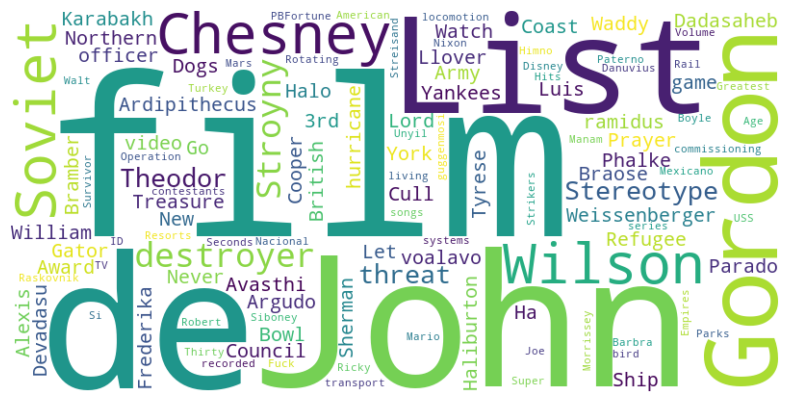

In [11]:
#we want to inspect the rows where the body is absent 
articles_df_no_body = articles_df[articles_df['Body'].isna()]  
#display the word cloud of the titles 
# Prepare text for the word cloud
text_no_body = ' '.join(articles_df_no_body['Title'])

# Generate the word cloud
wordcloud_no_body = WordCloud(width=800, height=400, background_color='white').generate(text_no_body)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_body, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
#count the number of categories we have 
articles_df['Categories'].count()

5000

In [32]:
#we want to convert the column categories to list type to remove the quotation marks that hinder the explode operation 
import ast 
# Function to convert string representations of lists to actual lists
def convert_to_list(column):
    return column.apply(ast.literal_eval)

# Convert the 'Categories' column to actual lists
articles_df['Categories'] = convert_to_list(articles_df['Categories'])

ValueError: malformed node or string: ['Soil and crop science organizations', 'Agricultural organizations based in Canada']

In [33]:
articles_df.head()

,ID,Title,URL,Introduction/Summary,Body,Sections/Headings,References,Categories,Infobox
0,10,Canadian Society of Soil Science,https://en.wikipedia.org/wiki/Canadian_Society...,The Canadian Society of Soil Science (CSSS) is...,Canadian non-profit organization\nCanadian Soc...,"['Contents', 'Administration[edit]', 'Publicat...",['https://archive.org/details/literatureofsoil...,"[Soil and crop science organizations, Agricult...","{'Abbreviation': 'CSSS', 'Formation': '1954[1]..."
1,1,King Arthur's family,https://en.wikipedia.org/wiki/King_Arthur's_fa...,NaN,Family\n\n\nArthur in William Henry Margetson'...,"['Contents', 'Medieval Welsh tradition[edit]',...",['http://www.culhwch.info/index.html#footnote1...,"[Family of King Arthur, Legendary royal famili...",{}
2,6,Ralitsa Vassileva,https://en.wikipedia.org/wiki/Ralitsa_Vassileva,Ralitsa B. Vassileva (Bulgarian: Ралица Василе...,Bulgarian journalist\nRalitsa VassilevaBornRal...,"['Contents', 'Career[edit]', 'Awards, honours ...","['https://grady.uga.edu/faculty/vassileva/', '...","[1963 births, Living people, CNN people, Journ...",{'Born': 'Ralitsa Vassileva (1963-06-08) 8 Jun...
3,2,Tom Mooney (rugby league),https://en.wikipedia.org/wiki/Tom_Mooney_(rugb...,NaN,Australian rugby league footballer\nFor other ...,"['Contents', 'Career[edit]', 'References[edit]...",['http://www.yesterdayshero.com.au/PlayerProfi...,"[1952 births, Living people, Australian rugby ...",{'Born': '(1952-03-16) 16 March 1952 (age\xa07...
4,3,Topal (surname),https://en.wikipedia.org/wiki/Topal_(surname),"Topal is a Turkish word meaning ""lame"" and may...",TopalPronunciationTurkish: [ˈtopaɫ]OriginWord/...,"['Contents', 'Surnames of contemporary people[...",[],"[Surnames, Turkish-language surnames]","{'Pronunciation': 'Turkish: [ˈtopaɫ]', 'Word/n..."


In [45]:
#create a function that plot the n catgories of a plot  
#in the arguments we want to specify 

def categories_n(dataframe,column = 'Categories',n = 100,figure_size = (10, 6)) : 
    """
    Function that plots the occurence of the categories in the dataset 
    
    Arguments: 
    dataframe: The dataframe containing the column of the row which we want to plot its components 
    column: the column containing the factors, it is needs to have a categorical type 
    n : the number of top n categories we want to capture, the default is set as 100 
    figure_size: the figure size of the resulting plot, the default is set as (10, 6) 
    
    Returns: 
    A bar plot 
    
    """
    categories = dataframe[column].explode().value_counts().head(n) 
    plt.figure(figsize=figure_size)
    sns.barplot(x=categories.values, y=categories.index)
    plt.title('Distribution of Articles Across Categories')
    plt.xlabel('Number of Articles')
    plt.ylabel('Category')
    return plt.show()

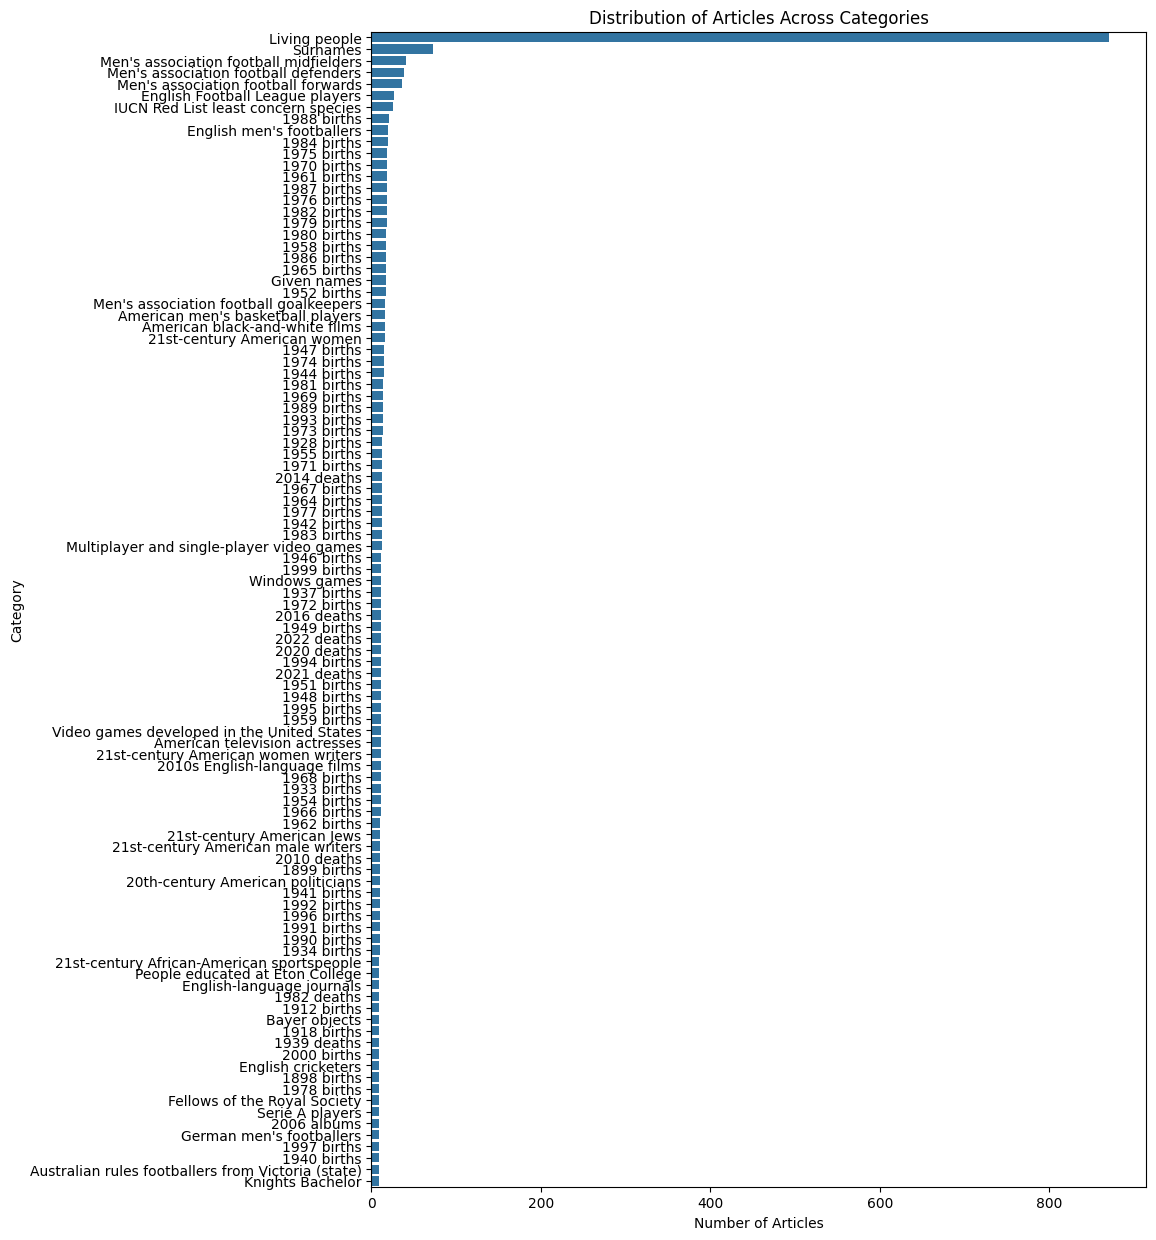

In [46]:
#plot all the catgories from the dataset 
#it takes alot of time to compile the result is not interpretable anyways 
categories_n(articles_df,n = 100,figure_size = (10,15)) 

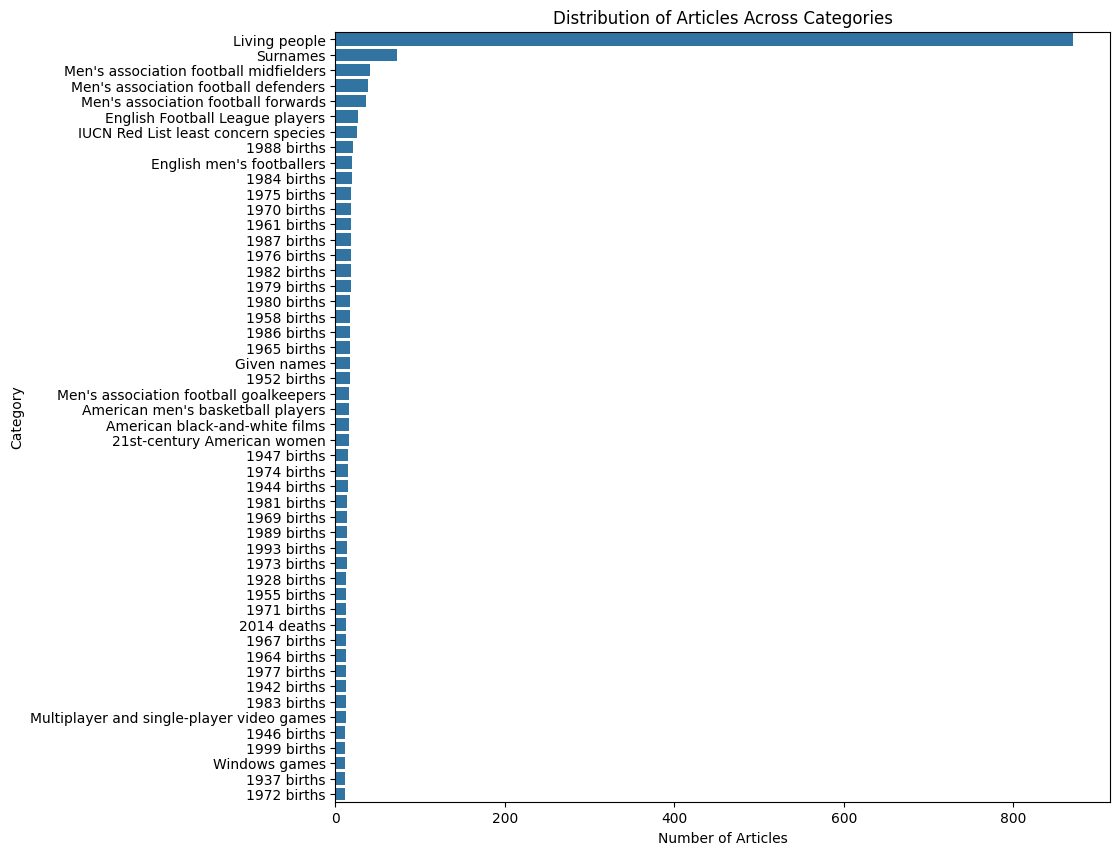

In [47]:
# we want to plot the tope 50 categories in the dataset 
categories_n(articles_df,n = 50,figure_size = (10,10))

### Interpretation 

<p style="font-size:16px;"> We can see through the depiction of the <b> 40 top categories </b> that births occupy an extensive amount in the categories with comparable proportions, so we will assemble them to make the analysis more efficient. </p>

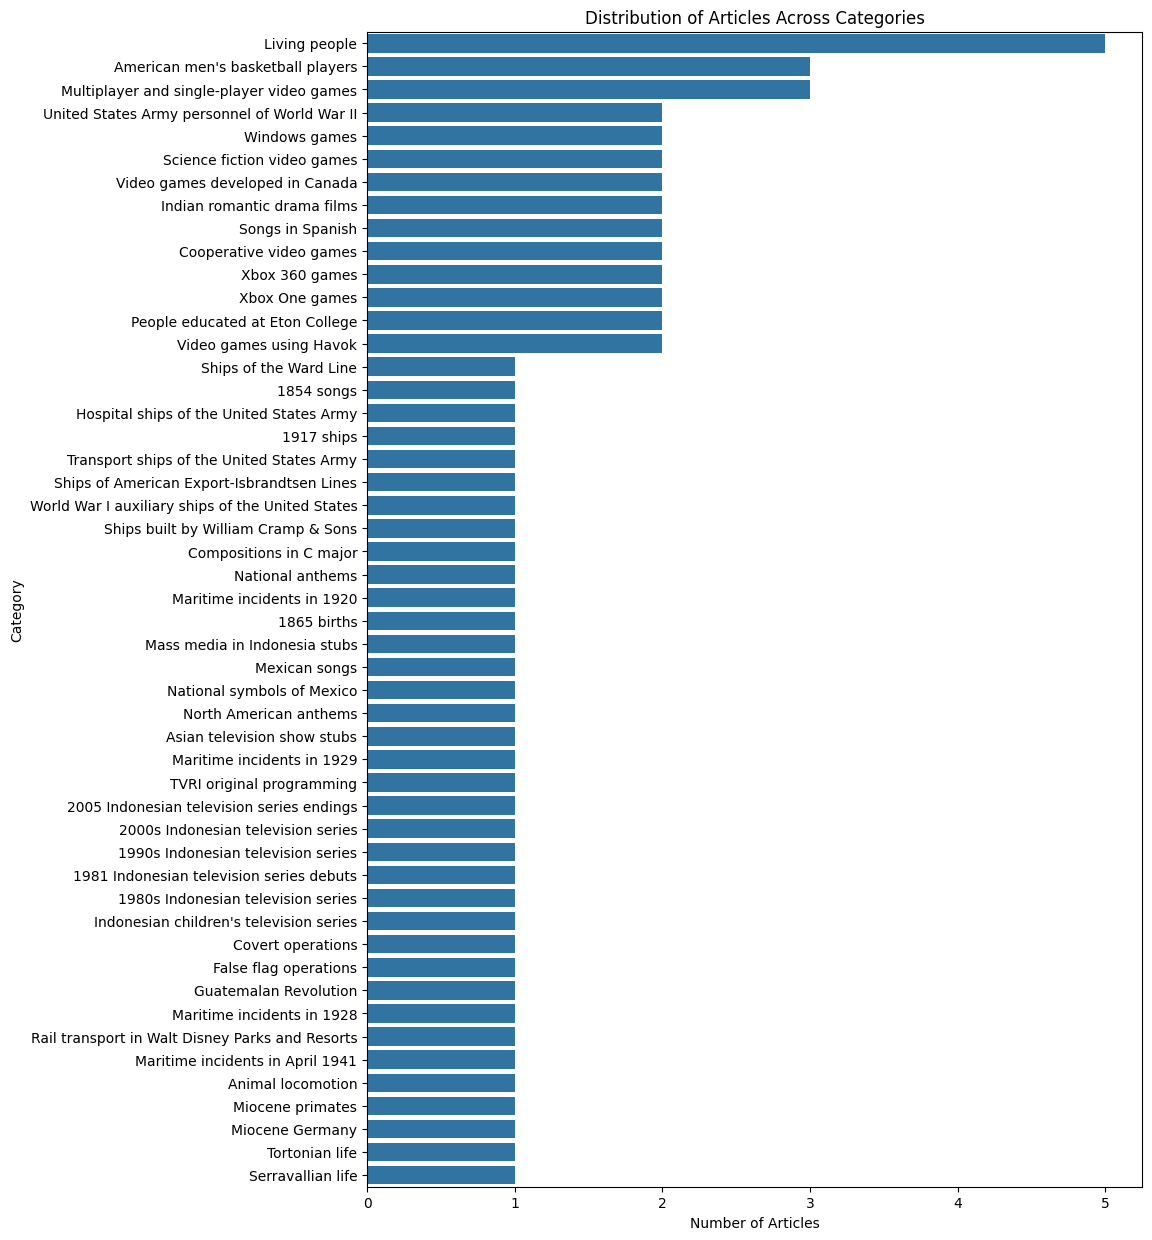

In [49]:
#we want to plot the categories of the the the rows that contain 'no body' 
categories_n(articles_df_no_body,n = 50,figure_size = (10,15))

### Interpretation 

<p style="font-size:16px;"> The articles that often have no body are the ones that are in a <b> list format.</b> </p>

In [50]:
#create a dataset from the categories count
categories_df = articles_df['Categories'].explode().value_counts().reset_index().rename(columns={0: 'Category'}) 
# Define the regex patterns 
pattern_birth = re.compile(r'.*birth.*', re.IGNORECASE) 
pattern_deaths = re.compile(r'.*death.*', re.IGNORECASE)  

#create a new column to replace whethever we find the words 'Categories' we out 'birth' 
categories_df['New_Category'] = categories_df['Categories']
categories_df['New_Category'] = categories_df['New_Category'].apply(lambda x: 'births' if pd.notna(x) and pattern_birth.search(x) else x) 
categories_df['New_Category'] = categories_df['New_Category'].apply(lambda x: 'deaths' if pd.notna(x) and pattern_deaths.search(x) else x) 

# we want to plot the top 50 categories in the dataset  

categories_grouped_df = categories_df.groupby('New_Category')['count'].sum().reset_index().sort_values('count',ascending = False)
categories_grouped_df_50 = categories_grouped_df.head(50)

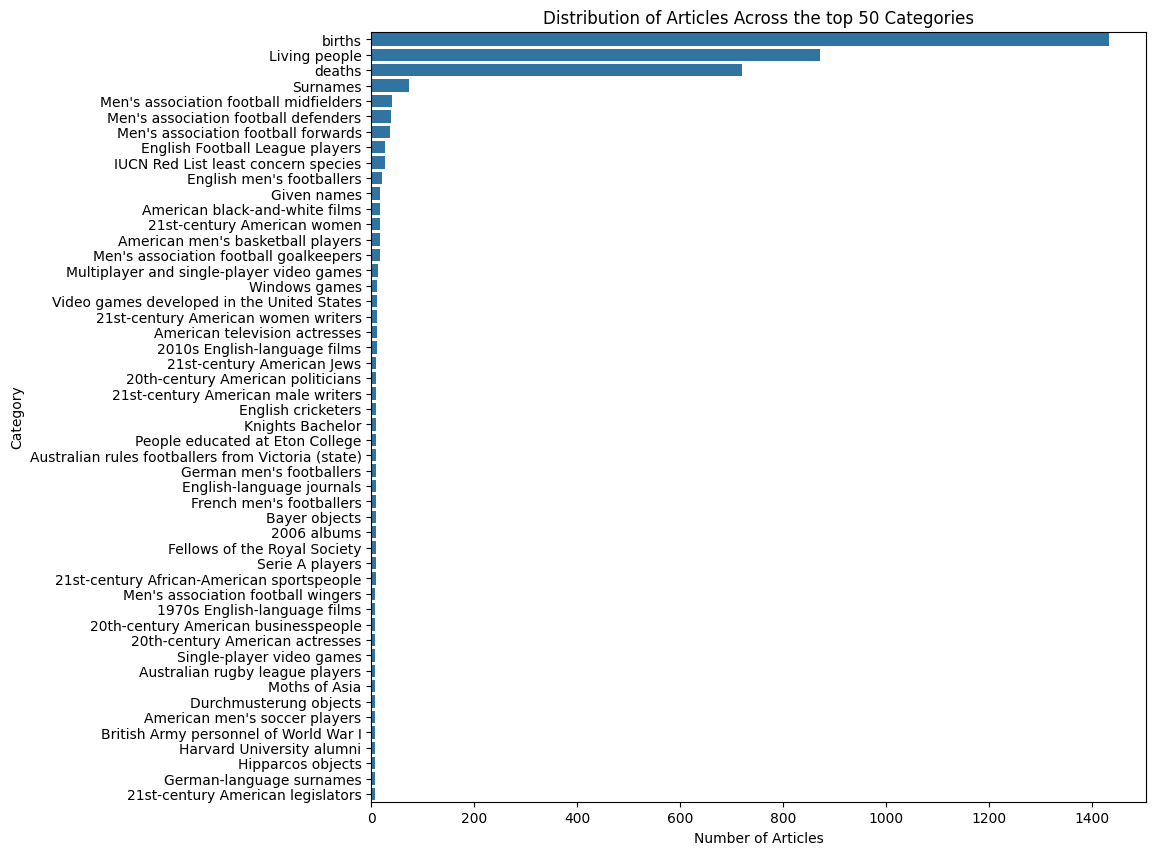

In [51]:
plt.figure(figsize=(10, 10)) 
sns.barplot(x = 'count',  y = 'New_Category', data = categories_grouped_df_50)
plt.title('Distribution of Articles Across the top 50 Categories')
plt.xlabel('Number of Articles')
plt.ylabel('Category')
plt.show()

### Interpretation 

<p style="font-size:16px;"> After assembling the births and deaths in one category each, we see that they occupy most of the article pages in Wikipedia. Another important category page is Living people which is too general with no insights and is essentially a list. Surnames do not bring about many insights as well. → we can remove them to see the general pattern in the pages.  </p>

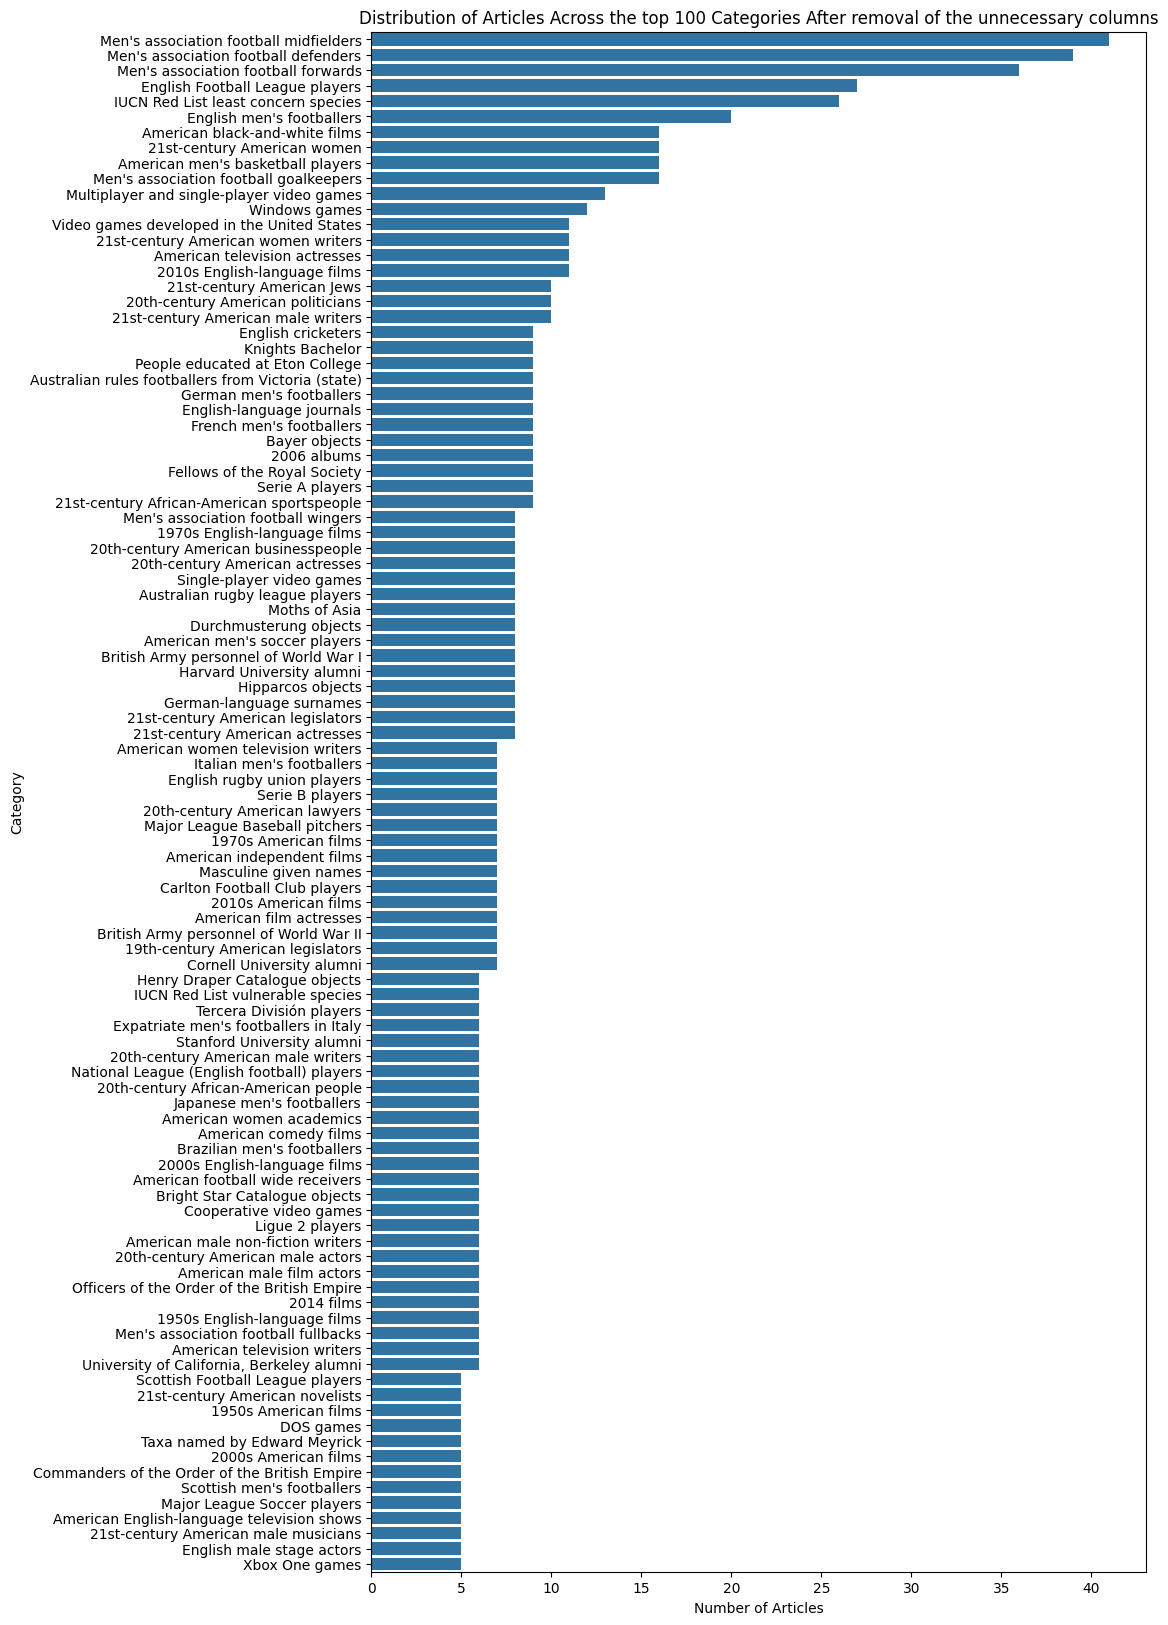

In [52]:
#remove the unnessary categories in the category 
values_to_remove = ['births','Living people','deaths','Surnames','Given names']  

# Filter out rows where 'Age' or 'City' are in the respective lists of values to remove
filtered_df = categories_grouped_df[~categories_grouped_df['New_Category'].isin(values_to_remove)]

#plot the filtered dataset 
plt.figure(figsize=(10, 20)) 
sns.barplot(x = 'count',  y = 'New_Category', data = filtered_df.head(100))
plt.title('Distribution of Articles Across the top 100 Categories After removal of the unnecessary columns')
plt.xlabel('Number of Articles')
plt.ylabel('Category')
plt.show()

### Interpretation 

<div style="font-size:16px;"> 

A primary look at the distribution we can note the following observations : 

- Football-themed articles are popular on Wikipedia.
- Men are more likely to dominate the article categories, though we need to see the degree of <b> association between men and football.</b> The thing to keep in mind is that in the analysis it has to be assumed that there is a <b> discriminatory factor between men and women and we opt to highlight it </b>.This leads to say that the ubiquitous nature of men is not due to the popularity of football in general but rather an inherent difference between the two due to systems that perpetuated this gap.  Keeping in mind that football is generally associated with the men.
- We can see that most of the pages focus on Western personas and subjects essentially American and English.
- We can also see that it is common to view works of art in terms of a specific like albums of 2006 are popular.

→ To verify the assumptions that we made, we can inspect the number of occurrences of certain words: nationality, gender, art, sport.

</div>

<div style= "background-color: lightblue; padding: 10px; border-radius: 5px; font-size: 16px;"> 

<b> Extract from an article (Mentionned in the Sources Section) </b>
   
<b> Why is football considered a men’s sport:</b> 
 
"Football is considered a male game due to several reasons. One reason is that it is often associated with masculine ideals and is seen as a symbol of masculinity. The cultural representation of football as a male-dominated sport has led to its association with male identity and the construction of dominant masculinities. Additionally, the historical influence of the industrial working classes in the development of football has contributed to its perception as a male game. The significance of football in the construction of gender roles and relationships has been observed in studies of primary schools, where it plays a central role in defining masculinity and shaping classroom dynamics. Furthermore, the dominance of male sports like football has contributed to the exclusion of women and the reinforcement of gender inequalities in sports."

</div>

## 2. WordCloud Generation 

###  2.1 Word Cloud for the titles in the dataset 

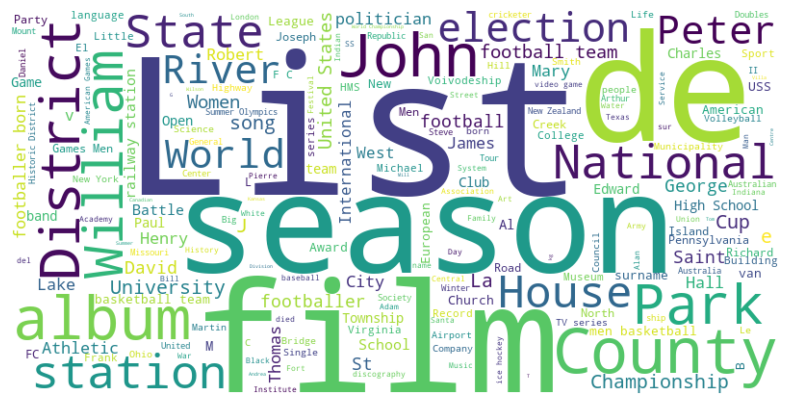

In [53]:
# Prepare text for the word cloud
text_title = ' '.join(articles_df['Title'])

# Generate the word cloud
wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate(text_title)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.show()

###  2.2 Word Cloud for the Body in the dataset 

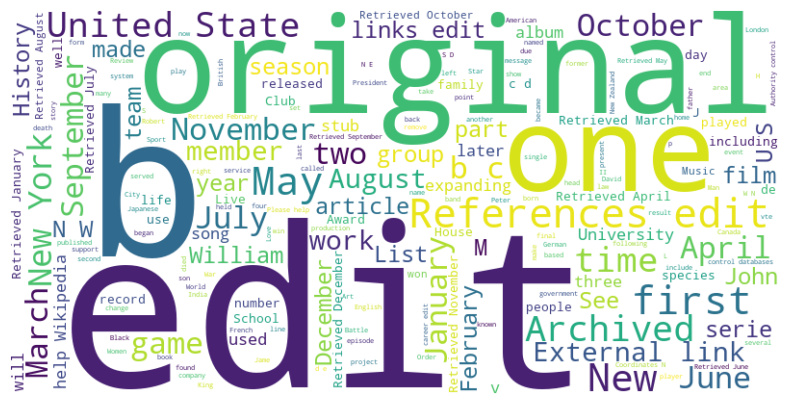

In [54]:
# Prepare text for the word cloud
text_body = ' '.join(articles_df['Body'].fillna(''))

# Generate the word cloud
wordcloud_body = WordCloud(width=800, height=400, background_color='white').generate(text_body)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_body, interpolation='bilinear')
plt.axis('off')
plt.show()

###  2.3 Word Cloud for the categories in the dataset 

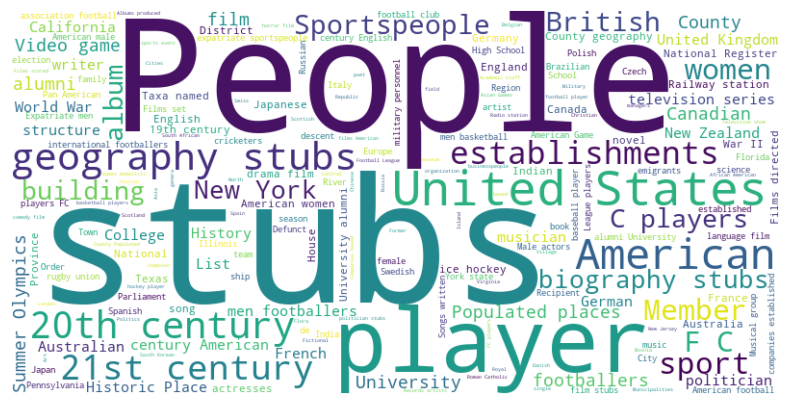

In [55]:
# Prepare text for the word cloud
text = ' '.join(filtered_df['New_Category'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Interpretation 

<p style="font-size:16px;"> As we can see through the word cloud common words in the categories column are stubs, people, and players. We can see as well major nationalities like <b> American, Canadian, French, Australian, and British</b>. Sports seem to occupy a considerable portion of the categories. </p>

## 3. Topic Modelling - LDA

### 3.1 Data Cleaning and Processing 

In [56]:
# set of stopwords in English 
stop = set(stopwords.words('english')) 
#Create a set of punctuation characters to exclude from the text 
exclude = set(string.punctuation)  
#Initialize the WordNet lemmatizer
lemma = WordNetLemmatizer()

In [57]:
#convert the body column to a list 
body_list = articles_df['Body'].fillna('').tolist()

In [58]:
#define the clean function 
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in body_list]    

### 3.2 Preparing the Document Term Matrix (DTM)

In [59]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 

dictionary = corpora.Dictionary(doc_clean) 

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]


### 3.3 Running LDA Model 

In [60]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

In [61]:
print(ldamodel.print_topics(num_topics=5, num_words=20))

[(0, '0.009*"retrieved" + 0.005*"–" + 0.004*"film" + 0.004*"album" + 0.003*"new" + 0.003*"original" + 0.003*"—" + 0.003*"archived" + 0.003*"time" + 0.002*"2017" + 0.002*"award" + 0.002*"october" + 0.002*"may" + 0.002*"first" + 0.002*"march" + 0.002*"music" + 0.002*"november" + 0.002*"january" + 0.002*"the" + 0.002*"year"'), (1, '0.007*"displaystyle" + 0.005*"1" + 0.004*"n" + 0.004*"x" + 0.003*"k" + 0.003*"b" + 0.002*"j" + 0.002*"−" + 0.002*"2" + 0.001*"c" + 0.001*"r" + 0.001*"g" + 0.001*"mouse" + 0.001*"temple" + 0.001*"a" + 0.001*"‖" + 0.001*"e" + 0.001*"01" + 0.001*"star" + 0.001*"cake"'), (2, '0.003*"new" + 0.003*"retrieved" + 0.003*"b" + 0.003*"p" + 0.003*"also" + 0.003*"university" + 0.003*"state" + 0.002*"may" + 0.002*"first" + 0.002*"one" + 0.002*"war" + 0.002*"isbn" + 0.002*"c" + 0.002*"time" + 0.002*"1" + 0.002*"two" + 0.002*"national" + 0.002*"system" + 0.002*"article" + 0.002*"company"'), (3, '0.006*"de" + 0.006*"retrieved" + 0.005*"party" + 0.004*"state" + 0.004*"election" 

### Conclusion 

<div style="font-size:16px;">
    The results of the <b> LDA model </b>  conclude that these are the top topics in the wiki pages:
    <ol>
        <li>Politics</li>
        <li>Sports</li>
        <li>Films</li>
        <li>Music</li>
        <li>Animals</li>
    </ol>
</div>


<div style="font-size:16px;">
   The contruction of the models did not help us in underpinning the previously detected <b> patterns </b> .To be able to see these patterns, we use <b> Named Entity Recognition <b> 
</div>


## 4. Named Entity Recognition 

In [62]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 258.0 kB/s eta 0:00:48
     - ------------------------------------- 0.5/12.8 MB 258.0 kB/s eta 0:00:48
     - ------------------------------------- 0.5/12.8 MB 258.0 kB/s eta 0:00:48
     -- ------------------------------------ 0.8/12.8 MB 310.8 kB/s eta 0:00:39
     -- ------------------------------------ 0.8/12.8 MB 310.8 kB/s eta 0:00:39
     -- ----------------

In [63]:
import spacy

In [64]:
nlp = spacy.load("en_core_web_sm")

In [65]:
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

#update the body column 
articles_df['Body'] = articles_df['Body'].fillna('')

articles_df['Entities'] = articles_df['Body'].apply(lambda x: extract_entities(x) if x else [])

articles_df[['ID', 'Title', 'Entities']].head()

,ID,Title,Entities
0,10,Canadian Society of Soil Science,"[(Canadian, NORP), (Canadian, NORP), (The Cana..."
1,1,King Arthur's family,"[(Family\n\n\nArthur, PERSON), (William Henry ..."
2,6,Ralitsa Vassileva,"[(Bulgarian, NORP), (Ralitsa, GPE), (1963-06-0..."
3,2,Tom Mooney (rugby league),"[(Australian, NORP), (Tom Mooney, PERSON), (To..."
4,3,Topal (surname),"[(TopalPronunciationTurkish, NORP), (English, ..."


In [11]:
from collections import Counter

<div style="font-size:16px;">
   Example of the format of an entity [(word1,entity1),(word2,entity2)] and this repeats for every row
what we want to do is iterate through these rows and extract the second element of the tulipe 
and then calculate the counts of each extracted element
</div>

In [12]:
#we will flatten the list of tuples contained in the row of Entities 
all_entities = [entity for sublist in articles_df['Entities'] for _, entity in sublist] 
# Count the occurrences of each entity
entity_counts = Counter(all_entities)

# Convert to a DataFrame for easier reading (optional)
entity_counts_df = pd.DataFrame(entity_counts.items(), columns=['Entity', 'Count'])

# Display the counts
entity_counts_df = entity_counts_df.sort_values(by = 'Count',ascending = False)  
entity_counts_df

,Entity,Count
4,PERSON,199362
6,DATE,185754
3,CARDINAL,160033
1,ORG,150533
2,GPE,104598
0,NORP,33404
12,WORK_OF_ART,25554
10,ORDINAL,13606
8,PRODUCT,11119
5,LOC,9875


<Axes: xlabel='Entity'>

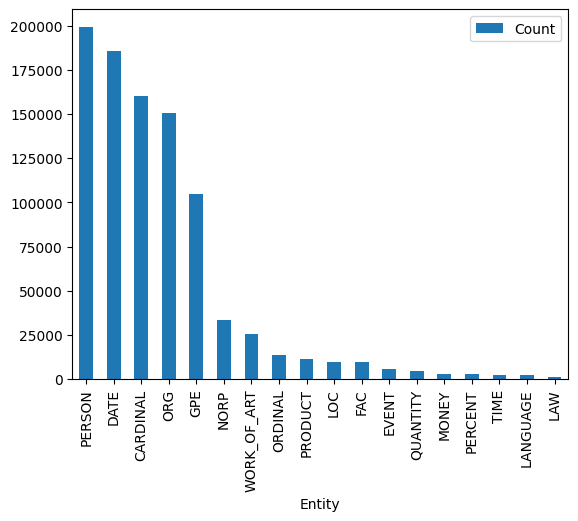

In [13]:
entity_counts_df.plot(x = 'Entity',y = 'Count',kind = 'bar')

<div style="font-size:16px;">
  We can see through this analysis that the most common entities in the dataset are :<b> Person, Date, Cardinal,ORG,GPE,NORP </b>. 
<b> So in our next analysis we are interested to see what are the most common words associated with these specific entities</b>
</div>

**Reference:**
1. https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/
2. https://www.techtarget.com/searchenterpriseai/definition/BERT-language-model 
3. https://typeset.io/questions/reasons-why-football-is-considered-as-male-game-4pyrvcj076